In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
os.getcwd()

'C:\\Users\\arunp\\mytest1'

In [8]:
df=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [9]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [11]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [12]:
df=df.drop(["Ticket #","Time",],axis=1)

In [13]:
df.head()

,Customer Complaint,Date,Date_month_year,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,Payment disappear - service got disconnected,04-08-15,04-Aug-15,Internet,Acworth,Georgia,30102,Closed,No
2,Speed and Service,18-04-15,18-Apr-15,Internet,Acworth,Georgia,30101,Closed,Yes
3,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,Internet,Acworth,Georgia,30101,Open,Yes
4,Comcast not working and no service to boot,26-05-15,26-May-15,Internet,Acworth,Georgia,30101,Solved,No


In [15]:
df['Date_month_year']=df['Date_month_year'].apply(pd.to_datetime)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Customer Complaint           2224 non-null   object        
 1   Date                         2224 non-null   object        
 2   Date_month_year              2224 non-null   datetime64[ns]
 3   Received Via                 2224 non-null   object        
 4   City                         2224 non-null   object        
 5   State                        2224 non-null   object        
 6   Zip code                     2224 non-null   int64         
 7   Status                       2224 non-null   object        
 8   Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 156.5+ KB


In [17]:
df=df.set_index("Date_month_year")

In [18]:
df.head()

,Customer Complaint,Date,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Date_month_year,,,,,,,,
2015-04-22,Comcast Cable Internet Speeds,22-04-15,Customer Care Call,Abingdon,Maryland,21009,Closed,No
2015-08-04,Payment disappear - service got disconnected,04-08-15,Internet,Acworth,Georgia,30102,Closed,No
2015-04-18,Speed and Service,18-04-15,Internet,Acworth,Georgia,30101,Closed,Yes
2015-07-05,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,Internet,Acworth,Georgia,30101,Open,Yes
2015-05-26,Comcast not working and no service to boot,26-05-15,Internet,Acworth,Georgia,30101,Solved,No


Text(0.5, 1.0, 'Monthly Trend chat')

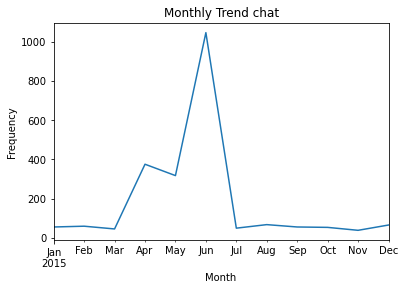

In [20]:
df.groupby(pd.Grouper(freq="M")).size().plot()
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.title("Monthly Trend chat")

In [21]:
df["Date"].value_counts()[:8]

24-06-15    218
23-06-15    190
25-06-15     98
26-06-15     55
30-06-15     53
29-06-15     51
18-06-15     47
06-12-15     43
Name: Date, dtype: int64

Text(0.5, 1.0, 'Daily Trend chat')

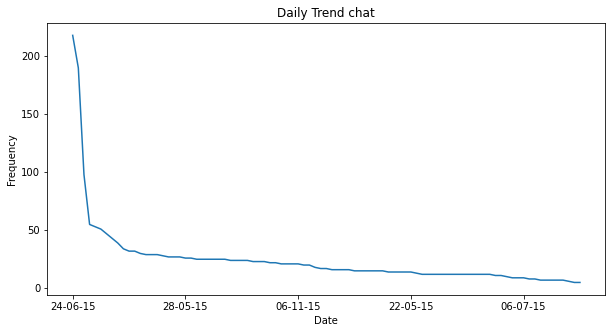

In [23]:
#plotting daily chart

df=df.sort_values(by="Date")
plt.figure(figsize=(10,5))
df["Date"].value_counts().plot()
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Daily Trend chat")

In [24]:
#Provide a table with the frequency of complaint types

In [25]:
df['Customer Complaint'].value_counts()[:9]

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Billing             11
Comcast Data Caps           11
Data Caps                   11
Unfair Billing Practices     9
Internet speed               8
Name: Customer Complaint, dtype: int64

<AxesSubplot:>

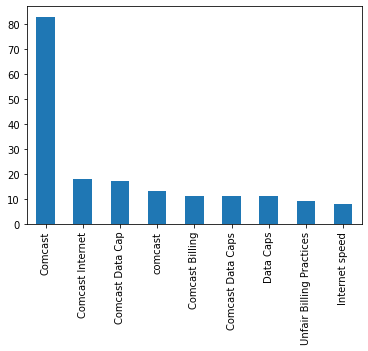

In [26]:
df['Customer Complaint'].value_counts()[:9].plot.bar()

In [27]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
#- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
#- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

In [28]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [29]:
df['Customer Complaint'].unique()

array(['Fraudulent claims reported to collections agency',
       'Comcast refusal of service', 'Comcast Cable', ...,
       'Comcast of East Windsor NJ Complaint',
       'Complaint against Comcast for incredibly bad service',
       'Questionable internet slowdown'], dtype=object)

In [30]:
st="welcome to DS"

In [33]:
df[df['Customer Complaint'].str.contains('network')]

,Customer Complaint,Date,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Date_month_year,,,,,,,,
2015-06-23,Not receiving network speed as advertised,23-06-15,Customer Care Call,Lancaster,Pennsylvania,17603,Open,No


In [34]:
df[df['Customer Complaint'].str.contains('network')].count()

Customer Complaint             1
Date                           1
Received Via                   1
City                           1
State                          1
Zip code                       1
Status                         1
Filing on Behalf of Someone    1
dtype: int64

In [35]:
internet_issue1=df[df['Customer Complaint'].str.contains('network')].count()

In [36]:
internet_issue2=df[df['Customer Complaint'].str.contains('speed')].count()

In [37]:
internet_issue3=df[df['Customer Complaint'].str.contains('data')].count()

In [38]:
internet_issue4=df[df['Customer Complaint'].str.contains('internet')].count()

In [39]:
billing_issue1=df[df['Customer Complaint'].str.contains('billing')].count()

In [40]:
billing_issue2=df[df['Customer Complaint'].str.contains('charges')].count()

In [41]:
billing_issue3=df[df['Customer Complaint'].str.contains('billing')].count()

In [42]:
service_issue1=df[df['Customer Complaint'].str.contains('service')].count()

In [43]:
service_issue2=df[df['Customer Complaint'].str.contains('customer')].count()

In [44]:
total_issue_internet=internet_issue1+internet_issue2+internet_issue3+internet_issue4

In [45]:
total_issue_internet

Customer Complaint             374
Date                           374
Received Via                   374
City                           374
State                          374
Zip code                       374
Status                         374
Filing on Behalf of Someone    374
dtype: int64

In [46]:
total_billing_issues=billing_issue1+billing_issue2+billing_issue3

In [47]:
total_billing_issues

Customer Complaint             295
Date                           295
Received Via                   295
City                           295
State                          295
Zip code                       295
Status                         295
Filing on Behalf of Someone    295
dtype: int64

In [48]:
total_service_issues=service_issue1+service_issue2

In [49]:
total_service_issues

Customer Complaint             360
Date                           360
Received Via                   360
City                           360
State                          360
Zip code                       360
Status                         360
Filing on Behalf of Someone    360
dtype: int64

In [51]:
df.shape

(2224, 8)

In [52]:
other_issue=2224-(total_service_issues+total_billing_issues+total_issue_internet)

In [53]:
other_issue

Customer Complaint             1195
Date                           1195
Received Via                   1195
City                           1195
State                          1195
Zip code                       1195
Status                         1195
Filing on Behalf of Someone    1195
dtype: int64

In [54]:
#Create a new categorical variable with value as Open and Closed. (cont..)
#Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [56]:
df["newStatus"]=['Open' if Status=='Open' or Status=='pending' else 'closed' for Status in df["Status"]]

In [57]:
df.sample(10)

,Customer Complaint,Date,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,newStatus
Date_month_year,,,,,,,,,
2015-06-23,Billing & Data Usage,23-06-15,Internet,Canton,Mississippi,39046,Solved,No,closed
2015-05-31,Comcast deceptive selling billing lack of serv...,31-05-15,Internet,Evans,Georgia,30809,Closed,No,closed
2015-04-28,Comcast Internet down since 4/25 with no resolve,28-04-15,Customer Care Call,Mt. Pleasant,South Carolina,29464,Closed,No,closed
2015-08-04,new fcc internet rules slowing down system,04-08-15,Internet,Middletown,Connecticut,6457,Closed,No,closed
2015-01-06,Comcast is double billing me and not processin...,06-01-15,Customer Care Call,City Of Orange,New Jersey,7050,Closed,No,closed
2015-04-24,problems with internet service,24-04-15,Internet,York Haven,Pennsylvania,17370,Closed,No,closed
2015-11-06,"Sold one service, received another",06-11-15,Customer Care Call,Northport,Alabama,35473,Closed,No,closed
2015-06-24,Promised Speeds,24-06-15,Customer Care Call,West Valley City,Utah,84119,Solved,No,closed
2015-06-26,Suspected Throttling,26-06-15,Internet,Bloomington,Illinois,61704,Open,Yes,Open


In [58]:
#Which state has the maximum complaints

In [59]:
df.groupby(['State']).size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

In [66]:
#Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on
#stacking is equivalent to pivoting(unstack)

In [64]:
state_complain=df.groupby(['State','newStatus']).size().unstack()

In [65]:
state_complain

newStatus,Open,closed
State,,
Alabama,4.0,22.0
Arizona,2.0,18.0
Arkansas,NaN,6.0
California,47.0,173.0
Colorado,12.0,68.0
Connecticut,2.0,10.0
Delaware,3.0,9.0
District Of Columbia,1.0,15.0
District of Columbia,NaN,1.0


<AxesSubplot:xlabel='State'>

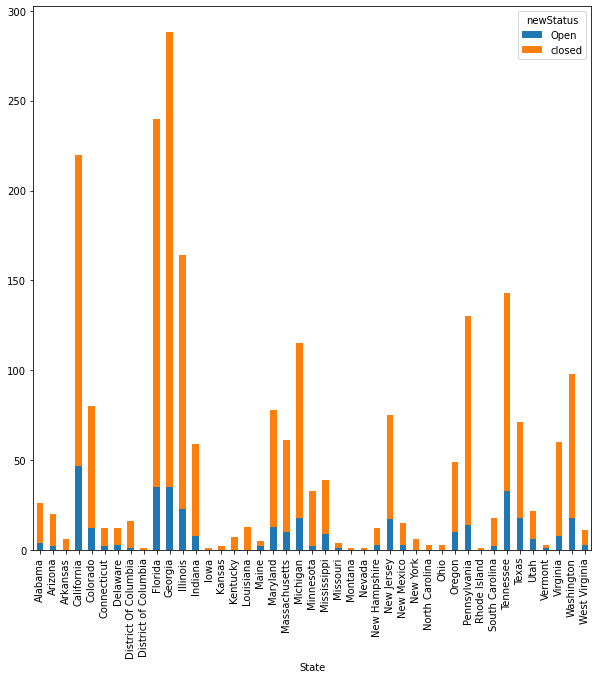

In [73]:
state_complain.plot.bar(figsize=(10,10),stacked=True)

In [74]:
#Which state has the highest percentage of unresolved complaints

In [75]:
df.newStatus.value_counts()

closed    1861
Open       363
Name: newStatus, dtype: int64

In [77]:
unresolved_data=df.groupby(['State','newStatus']).size().unstack().fillna(0).sort_values(by='Open',ascending=False)

In [78]:
unresolved_data

newStatus,Open,closed
State,,
California,47.0,173.0
Georgia,35.0,253.0
Florida,35.0,205.0
Tennessee,33.0,110.0
Illinois,23.0,141.0
Texas,18.0,53.0
Michigan,18.0,97.0
Washington,18.0,80.0
New Jersey,17.0,58.0


In [79]:
unresolved_data['unresolved_cmp_prct']=unresolved_data['Open']/unresolved_data['Open'].sum()*100

In [80]:
unresolved_data

newStatus,Open,closed,unresolved_cmp_prct
State,,,
California,47.0,173.0,12.947658
Georgia,35.0,253.0,9.641873
Florida,35.0,205.0,9.641873
Tennessee,33.0,110.0,9.090909
Illinois,23.0,141.0,6.336088
Texas,18.0,53.0,4.958678
Michigan,18.0,97.0,4.958678
Washington,18.0,80.0,4.958678
New Jersey,17.0,58.0,4.683196


<AxesSubplot:xlabel='State'>

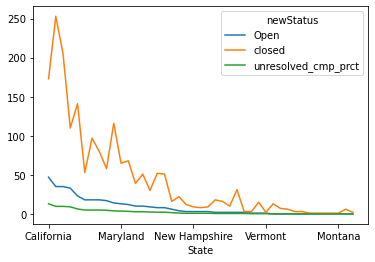

In [81]:
unresolved_data.plot()

In [82]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [88]:
resolved_data=df.groupby(['Received Via','newStatus']).size().unstack().fillna(0)

In [90]:
resolved_data['resolved']=resolved_data['closed']/resolved_data['closed'].sum()*100

<AxesSubplot:xlabel='Received Via'>

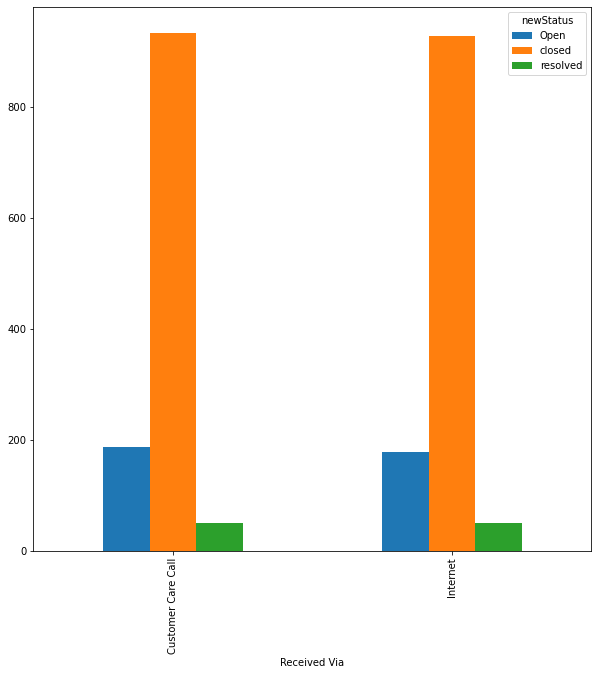

In [92]:
resolved_data.plot(kind='bar',figsize=(10,10))